In [1]:
import os
if os.getcwd().split("/")[-1] != 'BENDR-XAI': os.chdir("../")

import mne
import numpy as np
import matplotlib.pyplot as plt

## Test

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets import eegbci, fetch_fsaverage
from mne.minimum_norm import apply_inverse, read_inverse_operator
from pathlib import Path

# Download fsaverage files
fs_dir = Path(fetch_fsaverage(verbose=True))
subjects_dir = os.path.dirname(fs_dir)

# The files live in:
subject = 'fsaverage'
trans = 'fsaverage'  # MNE has a built-in fsaverage transformation
src_path = fs_dir / 'bem' / 'fsaverage-ico-5-src.fif'
bem_path = fs_dir / 'bem' / 'fsaverage-5120-5120-5120-bem-sol.fif'
edf_file = 'notebooks/S001R10.edf'

0 files missing from root.txt in /home/andersgm/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /home/andersgm/mne_data/MNE-fsaverage-data/fsaverage


/home/andersgm/anaconda3/envs/XAI/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


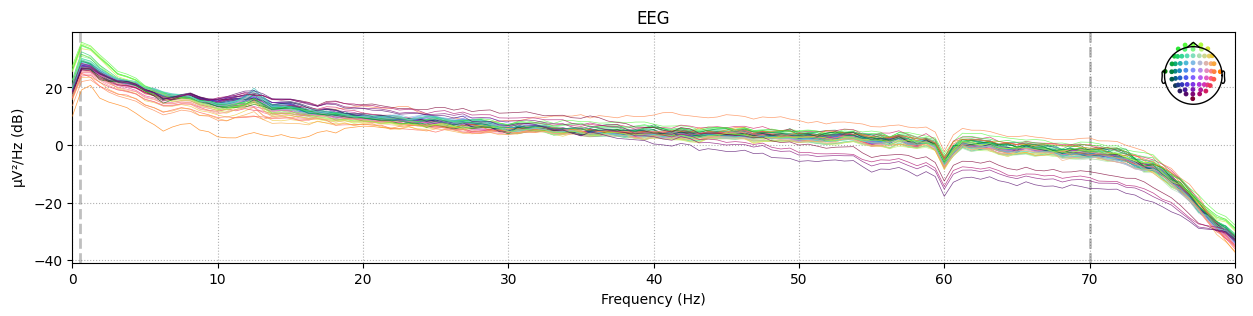

In [3]:
raw = mne.io.read_raw_edf(edf_file, verbose=False, preload=True)
mne.datasets.eegbci.standardize(raw)
raw = raw.set_eeg_reference(ref_channels='average', projection=True, verbose = False)

montage = mne.channels.make_standard_montage('standard_1020')
raw = raw.set_montage(montage)

raw = raw.filter(0.5, 70, verbose = False)
raw = raw.notch_filter(60, verbose = False)

fig, ax = plt.subplots(1, 1, figsize=(15, 3))
raw.compute_psd(verbose = False).plot(axes = ax)
plt.show()

In [4]:
src = mne.read_source_spaces(src_path, verbose=False)
fwd = mne.make_forward_solution(raw.info, trans=trans, src=src, bem=bem_path,
                                meg=False, eeg=True, n_jobs=4, verbose=False)
#fwd = mne.convert_forward_solution(fwd, force_fixed=True, verbose=False)

In [5]:
cov = mne.compute_raw_covariance(raw, verbose = False)
inv = mne.minimum_norm.make_inverse_operator(raw.info, fwd, cov, verbose=False)

In [6]:
snr = 10
lambda2 = 1.0 / snr ** 2
method = "eLORETA"

In [7]:
stc = mne.minimum_norm.apply_inverse_raw(raw, inv, lambda2, method=method, 
                                         nave = 1, start = 0, stop = 1600,
                                         verbose = False)

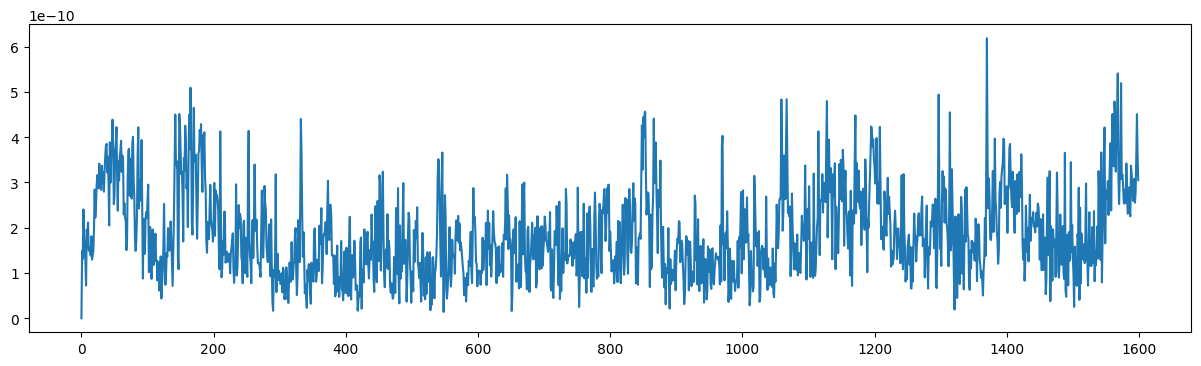

In [40]:
fig, ax = plt.subplots(1, 1, figsize = (15, 4))
ax.plot(stc.data[0, :])
plt.show()